In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from pytrends.request import TrendReq
import time

### Setup pytrend library and keyword define

In [2]:
pytrends = TrendReq(hl = 'en-US', tz = 360)
keyword = "Cloud computing"

#### Data Request

In [3]:
pytrends.build_payload([keyword], cat = 0, timeframe = 'today 12-m', geo = '', gprop = '')

#### Country Wise Interest

In [4]:
time.sleep(3)
region_data = pytrends.interest_by_region()
region_data = region_data.sort_values(by = keyword, ascending = False).head(15)

C:\Users\vikas\AppData\Local\Temp\ipykernel_3612\2524006992.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = region_data[keyword], y = region_data.index, palette = "Blues_d")


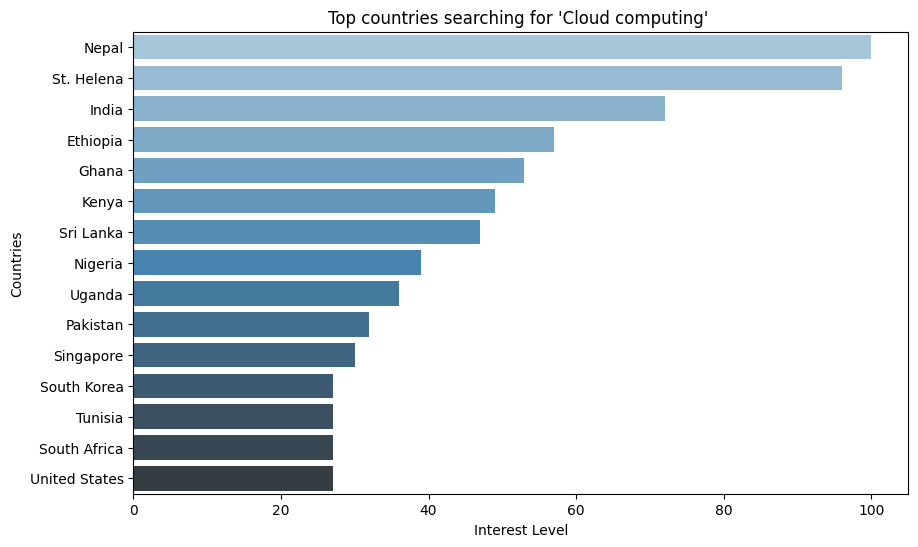

In [5]:
plt.figure(figsize= (10,6))
sns.barplot(x = region_data[keyword], y = region_data.index, palette = "Blues_d")
plt.title(f"Top countries searching for '{keyword}' ")
plt.xlabel("Interest Level")
plt.ylabel("Countries")
plt.show()

#### World Map Visualization

In [8]:
time.sleep(3)
region_data = region_data.reset_index()

fig = px.choropleth(
    region_data,
    locations='geoName',
    locationmode='country names',
    color=keyword,
    title=f"Search Interest for '{keyword}' by Country",
    color_continuous_scale='Blues')

fig.show()


C:\Users\vikas\AppData\Local\Temp\ipykernel_3612\1957110490.py:4: DeprecationWarning:

The library used by the *country names* `locationmode` option is changing in an upcoming version. Country names in existing plots may not work in the new version. To ensure consistent behavior, consider setting `locationmode` to *ISO-3*.



### Time Wise Interest

In [9]:
time.sleep(3)
time_df = pytrends.interest_over_time()

d:\Data-Science-Projects\Data-Science-Google-Data-Analysis\myvenv\Lib\site-packages\pytrends\request.py:260: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



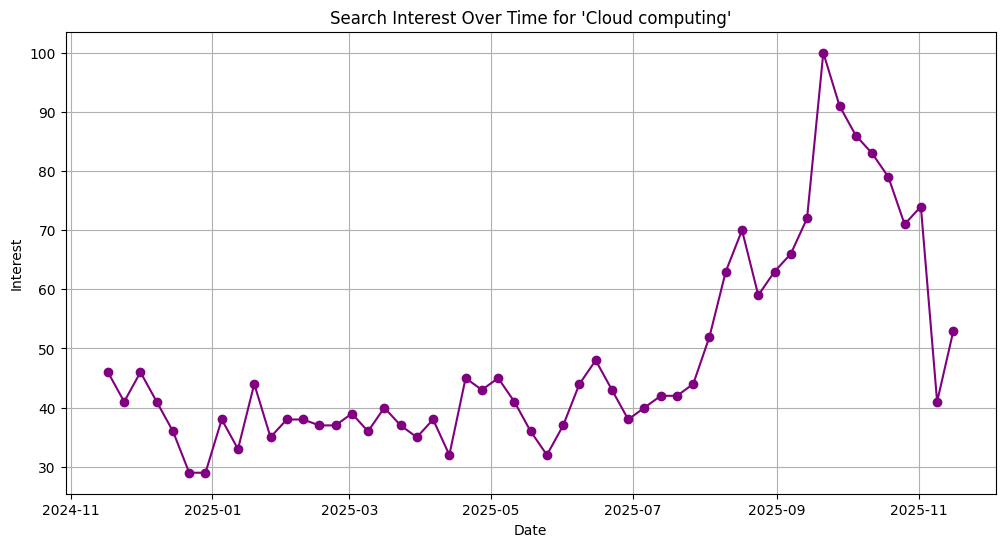

In [11]:
plt.figure(figsize=(12,6))
plt.plot(time_df.index, time_df[keyword], marker = 'o', color = 'purple')
plt.title(f"Search Interest Over Time for '{keyword}'")
plt.xlabel("Date")
plt.ylabel("Interest")
plt.grid(True)
plt.show()

#### Multiple Keywords Comparison

In [12]:
kw_list = ["Cloud computing", "Artificial Intelligence", "Machine Learning"]
pytrends.build_payload(kw_list, cat = 0, timeframe = 'today 12-m', geo = '', gprop='')

d:\Data-Science-Projects\Data-Science-Google-Data-Analysis\myvenv\Lib\site-packages\pytrends\request.py:260: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

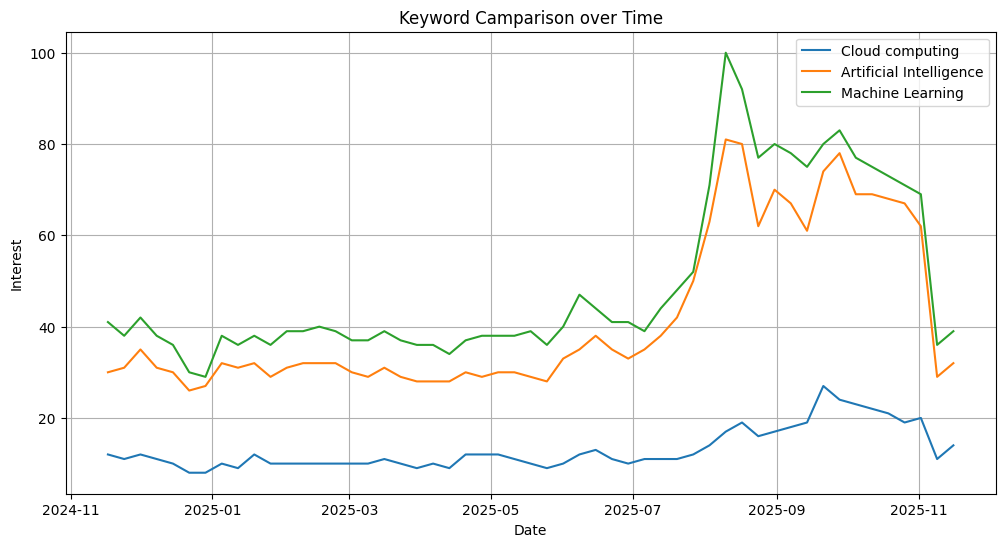

In [16]:
compare_df = pytrends.interest_over_time()

plt.figure(figsize=(12,6))

for kw in kw_list:
    plt.plot(compare_df.index, compare_df[kw], label = kw)

plt.title("Keyword Camparison over Time")
plt.xlabel("Date")
plt.ylabel("Interest")
plt.legend()
plt.grid(True)
plt.tight_layout